<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
It's info from our dataset. Every feature/column is a input nod 
### Hidden Layer:
### Output Layer:
### Neuron: 
Takes info from previous layer, takes weighted sum of that info as a bias term, passes it through activation value and passes info to the next layer (recieving signal, processing signal, deciding how much signal pass to next layer)
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [44]:
import numpy as np

In [45]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')


In [46]:
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [47]:
correct_output = [[0], [1], [0], [1]]

In [48]:
##### Your Code Here #####
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [49]:
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.08340853],
       [ 0.21813962],
       [-0.64526674]])

In [50]:
for iteration in range(1000):
    weighted_sum = np.dot(df, weights)
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_output - activated_output
    adjustments = error * sigmoid_der(weighted_sum)
    
    weights += np.dot(df.T, adjustments)
    
print('WEIGHTS after training')
print(weights)
print('OUTPUT after training')
print(activated_output)

WEIGHTS after training
[[ 6.62427637]
 [-1.14438037]
 [-3.23197482]]
OUTPUT after training
[[0.03799889]
 [0.9674465 ]
 [0.01242301]
 [0.9958438 ]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [73]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [74]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


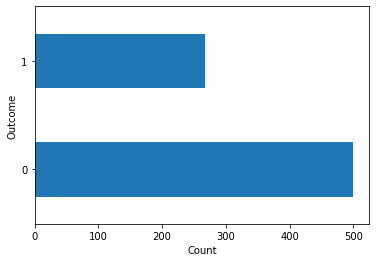

In [75]:
diabetes['Outcome'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Outcome")
plt.show()

In [76]:
df = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [77]:
from sklearn.preprocessing import MinMaxScaler, Normalizer


transformer = Normalizer()

# feats = list(diabetes)[:-1]

X = transformer.transform(df)

In [78]:
X = pd.DataFrame(X, columns=diabetes.drop("Outcome",axis = 1).columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655
...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
766,0.006653,0.838285,0.399184,0.000000,0.000000,0.200257,0.002322,0.312694


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = target, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [80]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X_train.shape[1])

        for i in range(self.niter):
            
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X_train, self.weight)

            # Activate!
            activated_output = sigmoid(weighted_sum)

            # Cac error
            error = X_test - activated_output

            # Update the Weights
            weights += np.dot(X_train.T, adjustments)
            
    def net_input(self, X_tain):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [81]:
pn = Perceptron(10)
pn.fit(X_train, Y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

ValueError: shapes (614,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?